19 gennaio 2023
azimuth parabola: 85

azimuth vero: 80

ora inizio parabola: 00:00

ora fine parabola: 02:56

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm

# 20 gradi salita

In [105]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 00:30:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 00:36:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 20 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

In [106]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [107]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [108]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [109]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [110]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [111]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [112]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

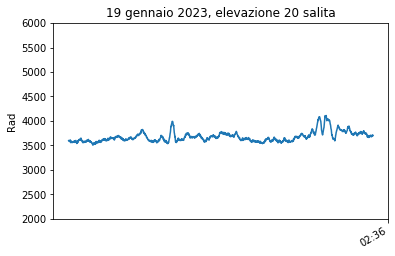

In [113]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [114]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [115]:
df.to_csv('dati20s.csv', index=False)

# 25 Salita

In [116]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:06:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:08:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 25 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

In [117]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [118]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)


In [119]:
while parabola.at[0,'elevazione'] > 25.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [120]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [121]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [122]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

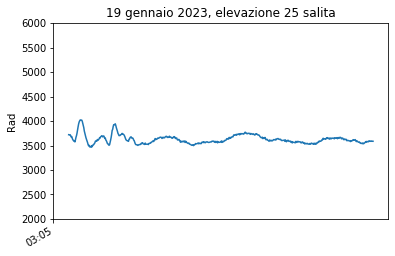

In [123]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [124]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [125]:
df.to_csv('dati25s.csv', index=False)

# 30 salita

In [126]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:12:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:14:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 30 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 30.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

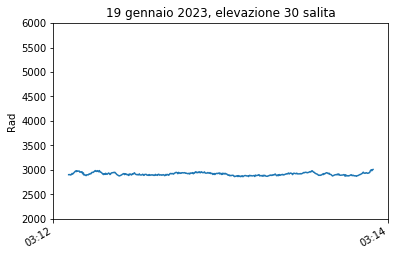

In [127]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [128]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [129]:
df.to_csv('dati30s.csv', index=False)

# 35 salita

In [130]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:22:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:23:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 35 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 35.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

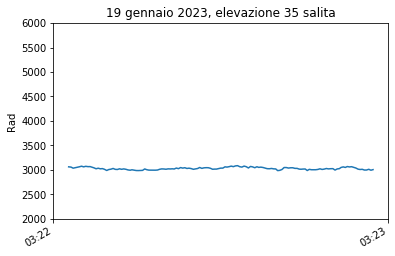

In [131]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [132]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [133]:
df.to_csv('dati35s.csv', index=False)

# 40 salita

In [134]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:31:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:32:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 40 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 40.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

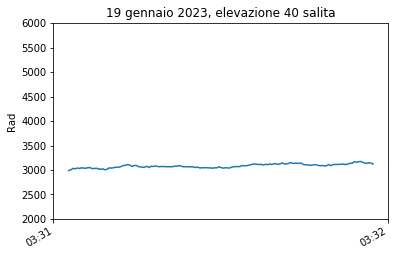

In [135]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [136]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [137]:
df.to_csv('dati40s.csv', index=False)

# 45 salita

In [138]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:37:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:38:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 45 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 45.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

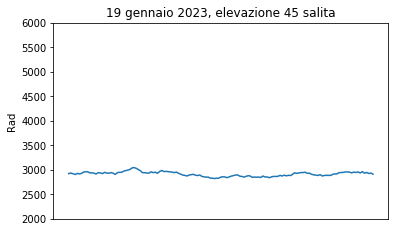

In [139]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [140]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [141]:
df.to_csv('dati45s.csv', index=False)

# 50 salita

In [142]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:45:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:47:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 50 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 50.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

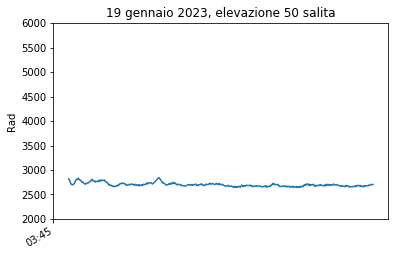

In [143]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [144]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [145]:
df.to_csv('dati50s.csv', index=False)

# 55 elevazione

In [146]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:55:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:56:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 55'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 55.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

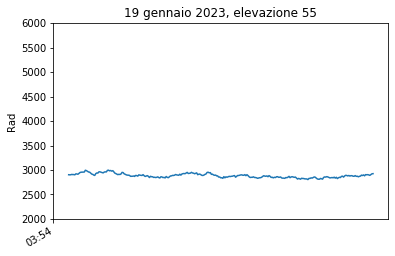

In [147]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [148]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [149]:
df.to_csv('dati55s.csv', index=False)

# 50 discesa

In [150]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:01:40', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:03:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 50 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 50.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

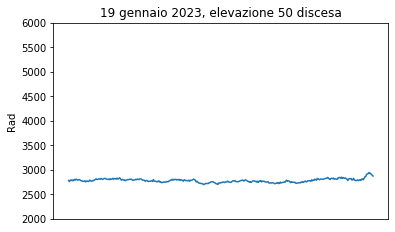

In [151]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [152]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [153]:
df.to_csv('dati50d.csv', index=False)

# 45 discesa

In [154]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:08:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:11:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 45 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 45.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

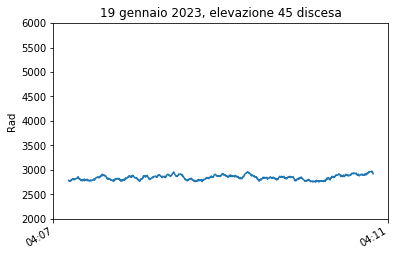

In [155]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [156]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [157]:
df.to_csv('dati45d.csv', index=False)

# 40 discesa

In [158]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:16:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:20:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 40 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 40.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

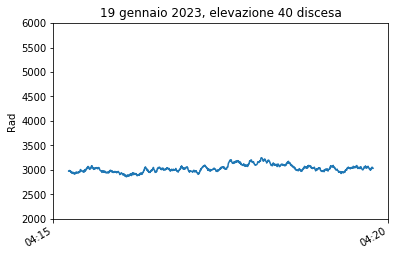

In [159]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [160]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [161]:
df.to_csv('dati40d.csv', index=False)

# 35 discesa

In [162]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:26:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:27:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 35 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 35.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

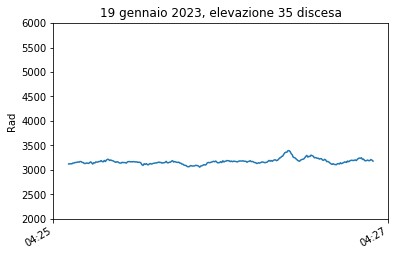

In [163]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [164]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [165]:
df.to_csv('dati35d.csv', index=False)

# 30 discesa

In [166]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:32:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:36:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 30 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 30.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

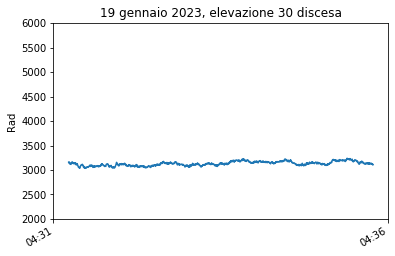

In [167]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [168]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [169]:
df.to_csv('dati30d.csv', index=False)

# 25 discesa

In [170]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:40:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:44:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 25 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 25.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

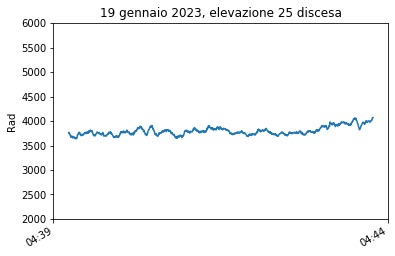

In [171]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [172]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [173]:
df.to_csv('dati25d.csv', index=False)

# 20 discesa

In [174]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 02:51:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 02:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 20 discesa'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

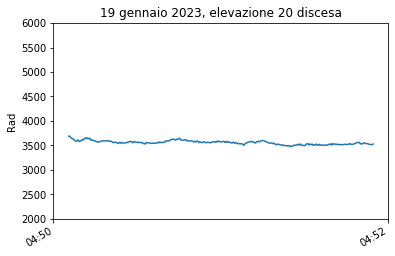

In [175]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [176]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [177]:
df.to_csv('dati20d.csv', index=False)